# **Netflix Movies And TV Shows Clustering**

---------------------------------------------

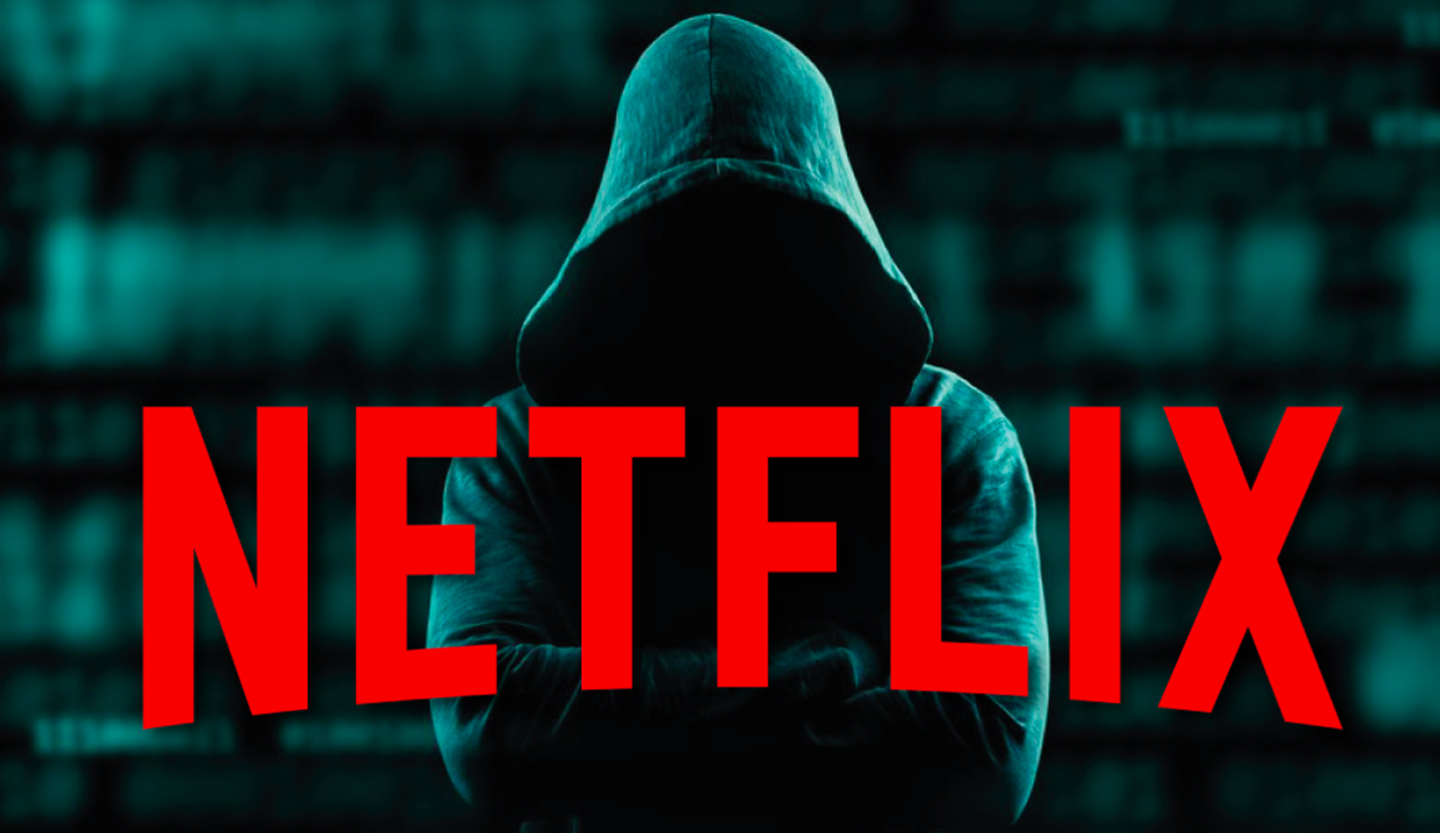

# **Project Summary -**

Netflix Movies and TV Shows Clustering is a data analysis and machine learning technique that Netflix uses to group their content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast and plot, and using algorithms to identify patterns and similarities. In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, which will lead to increased retention and company revenue.

Netflix Movies and TV Shows Clustering is a data-driven approach that Netflix uses to group its vast library of content into similar categories. The process involves collecting and analyzing various data points such as genre, cast, director, plot and other relevant features. Netflix will then use unsupervised machine learning algorithms to identify patterns and similarities between different titles.

Algorithms used in this process include clustering techniques such as k-means, hierarchical clustering, and principal component analysis (PCA). These algorithms help Netflix group movies and TV shows with similar features into distinct groups, each representing a unique genre or category.

The ultimate goal of this clustering is to improve the user experience on Netflix by providing personalized content recommendations to users using cosine similarity score. With the help of this, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will stay engaged with the platform.

In addition to improving user satisfaction, clustering analysis and recommender system also helps Netflix make data-driven decisions about content production and licensing. By understanding underlying trends and patterns in user behavior, Netflix can make informed decisions about which titles to produce or acquire and which to remove from its platform. This ultimately helps increase customer retention and company revenue.

In this project we have done-:

* Understanding the dataset and problem statement.
* Data Wrangling.
* Handling null vaulues and Data Cleaning.
* Text Preprocessing.
* Text Vectorization using TF-TDF.
* Clustering Analysis using different clustering algorithms.
* Checking out distribution of different cluster with the help of word cloud.
* Building a recommender system using cosine similarity.
* Conclusion

# **GitHub Link 👇🏻**

https://github.com/HarshJain41/Netflix-Movies-TVShow-Clustering

# **Problem Statement👇🏻**



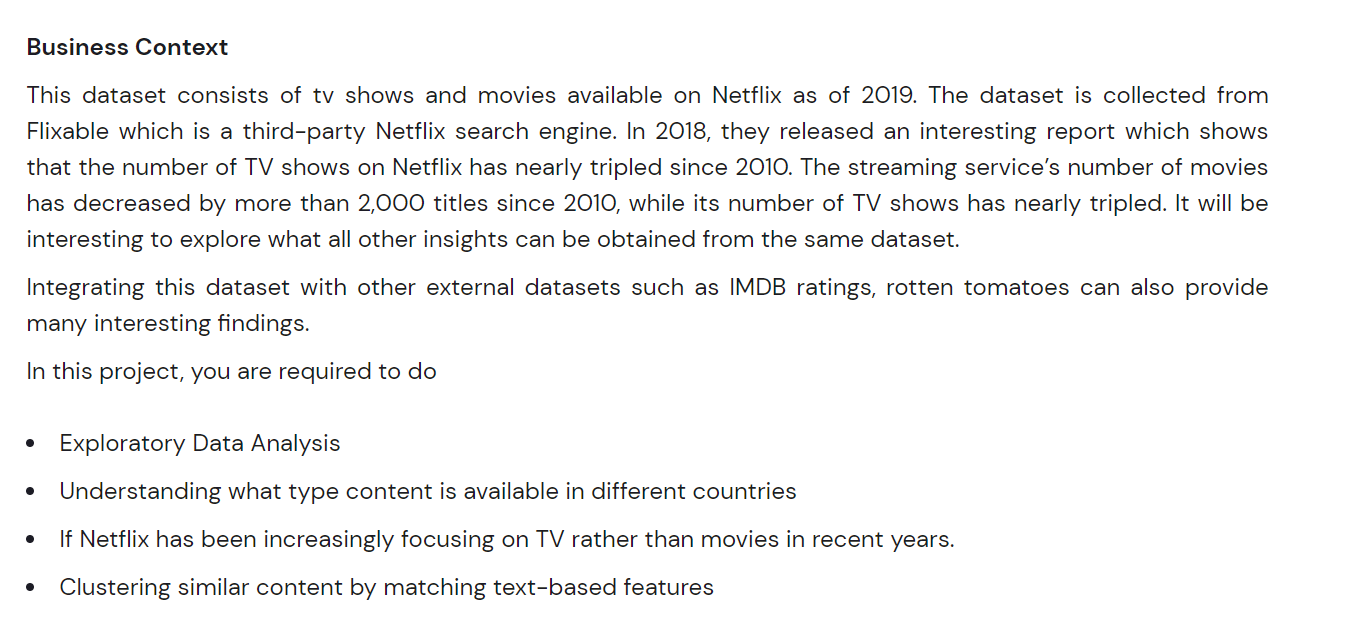

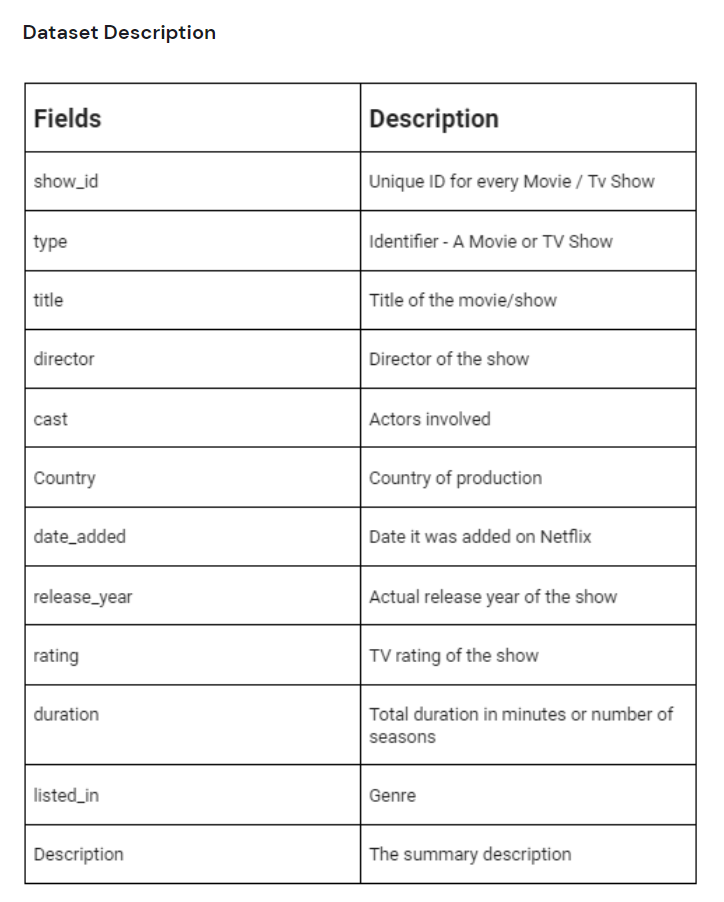

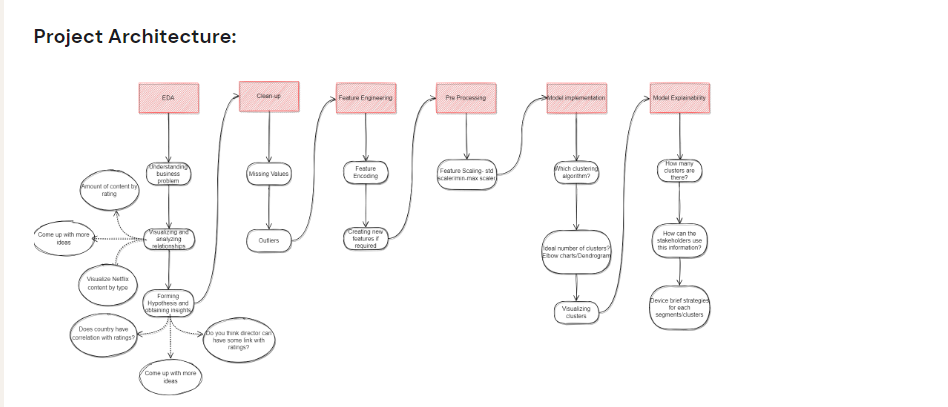

### Importing Necessary Libraries👇🏻

In [4]:
# Necessary Libraries
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


### Loading the given dataset👇🏻



In [5]:
# Load Dataset
data = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View👇🏻

In [6]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count👇🏻

In [7]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information👇🏻

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

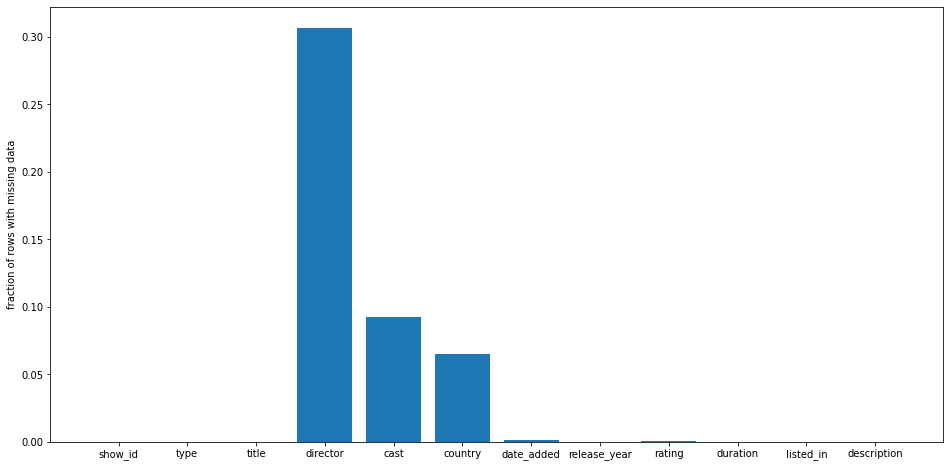

In [12]:
# null value distribution
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<AxesSubplot:>

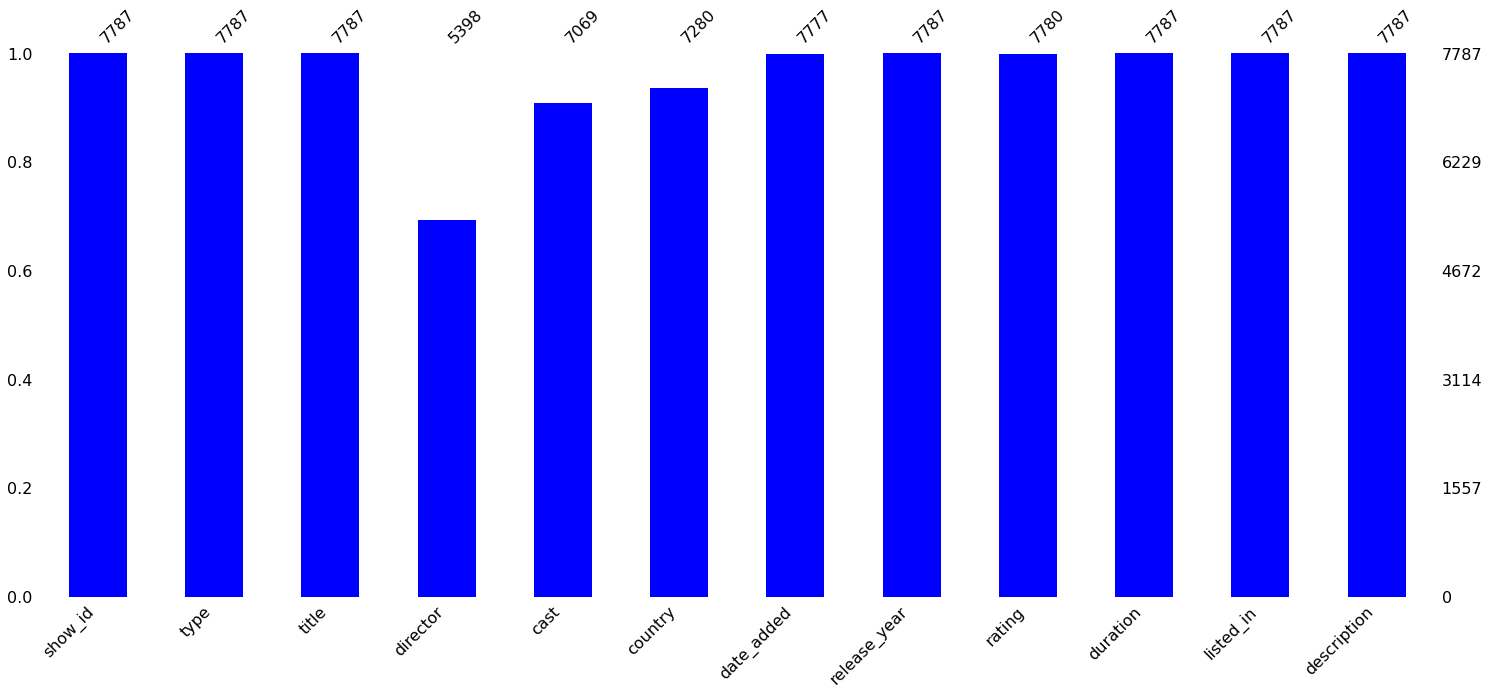

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(data, color = 'blue')

### What did you know about your dataset?

As we can check most of the columns are not having any missing of null value except
- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7) 

##  **Understanding Our Variables👇🏻**

In [14]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s6307,Movie,The Hollow Point,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Data Wrangling Code

In [16]:
# converting the cast column into a list
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
#fillna() is a function in Pandas, a Python library for data analysis, that we used to replace missing (NaN) values in our DataFrame with a specified value.
data['cast'].fillna('No cast',inplace=True)
data['country'].fillna(data['country'].mode()[0],inplace=True)
data['director'].fillna('', inplace=True)

In [19]:
#'date_added' and 'rating' contains an lower and not much important portion of the data so we will drop them from our analysis.
data.dropna(subset=['date_added','rating'],inplace=True)

In [20]:
#isnull() is a function in Pandas, a Python library for data analysis, that is used to identify missing (NaN) values in a DataFrame.
data.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### So as we can check here the null values are replaced and read for EDA and TexT Preprocessing.

## **Feature Engineering & Data Pre-processing**

### Textual Data Preprocessing 👇🏻

In [21]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the null values in our dataset are handled till now.

In [22]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [23]:
#merging all text column to single text column to work with

data['organized'] =  data['description'] + ' ' + data['listed_in'] + ' ' + data['country']+ ' ' + data['cast'] + ' '+ data['director']


In [24]:
#filled all the missing value with empty strings
data['organized'] = data['organized'].fillna("")

In [25]:
data['organized'][2]

"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. Horror Movies, International Movies Singapore Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim Gilbert Chan"

In [26]:
#text cleaning
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))   #to remove all non-alphabetic characters
data['organized'] = data['organized'].apply(cleaned)

#### 2. Lower Casing

In [27]:
# Lower Casing
data['organized']= data['organized'].str.lower()

#### 3. Removing Punctuations

In [28]:
import string

def remove_punctuation(text):
    # Create a translation table to remove punctuation using the string module
    translator = str.maketrans('', '', string.punctuation)
    # Apply the translation table to remove punctuation from the text
    text = text.translate(translator)
    return text

In [29]:
data['organized'].apply(remove_punctuation)

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: organized, Length: 7770, dtype: object

#### 4. Removing Stopwords

In [30]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Removing Stopwords
def remove_stopwords(text):
    # Tokenizing the text into words
    words = nltk.word_tokenize(text)
    # Removing stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into a single string
    text = ' '.join(words)
    return text


In [32]:
data['organized'].apply(remove_stopwords)

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family hes le...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next willy ...
7786    documentary delves mystique behind bluesrock t...
Name: organized, Length: 7770, dtype: object

#### 5. Text Normalization

In [33]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [34]:
def stem_text(text):
    words = nltk.word_tokenize(text)  # tokenizing the text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # applying the Snowball stemmer to each word
    return ' '.join(stemmed_words)  # joining the stemmed words back into a single string

# Apply the stem_text function to a column of a pandas DataFrame, such as a column called 'text'
data['org_new'] = data['organized'].apply(stem_text)

In [35]:
data.org_new

0       in a futur where the elit inhabit an island pa...
1       after a devast earthquak hit mexico citi trap ...
2       when an armi recruit is found dead his fellow ...
3       in a postapocalypt world ragdol robot hide in ...
4       a brilliant group of student becom cardcount e...
                              ...                        
7782    when lebanon civil war depriv zozo of his fami...
7783    a scrappi but poor boy worm his way into a tyc...
7784    in this documentari south african rapper nasti...
7785    dessert wizard adriano zumbo look for the next...
7786    this documentari delv into the mystiqu behind ...
Name: org_new, Length: 7770, dtype: object

In [36]:
data.org_new.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the save from squalor intern tv show tv drama tv scifi fantasi brazil joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi'

Here We used Snowball stemmer because it is a popular choice for stemming in NLP because it supports multiple languages, is accurate and efficient, and can be customized to meet specific needs.

#### 6. Text Vectorization

In [37]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,organized,org_new
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...,in a futur where the elit inhabit an island pa...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...,after a devast earthquak hit mexico citi trap ...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...,when an armi recruit is found dead his fellow ...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",in a postapocalyptic world ragdoll robots hide...,in a postapocalypt world ragdol robot hide in ...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,a brilliant group of students become cardcount...,a brilliant group of student becom cardcount e...


In [38]:
new_df = data[['title', 'org_new']]

In [39]:
new_df.head()

,title,org_new
0,3%,in a futur where the elit inhabit an island pa...
1,7:19,after a devast earthquak hit mexico citi trap ...
2,23:59,when an armi recruit is found dead his fellow ...
3,9,in a postapocalypt world ragdol robot hide in ...
4,21,a brilliant group of student becom cardcount e...


In [40]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(new_df['org_new'])
     

In [42]:
X.shape

(7770, 20000)

Here we have used Tf-idf vectorization beacause it takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### **Dimensionality Reduction using PCA**

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X.toarray())

PCA()

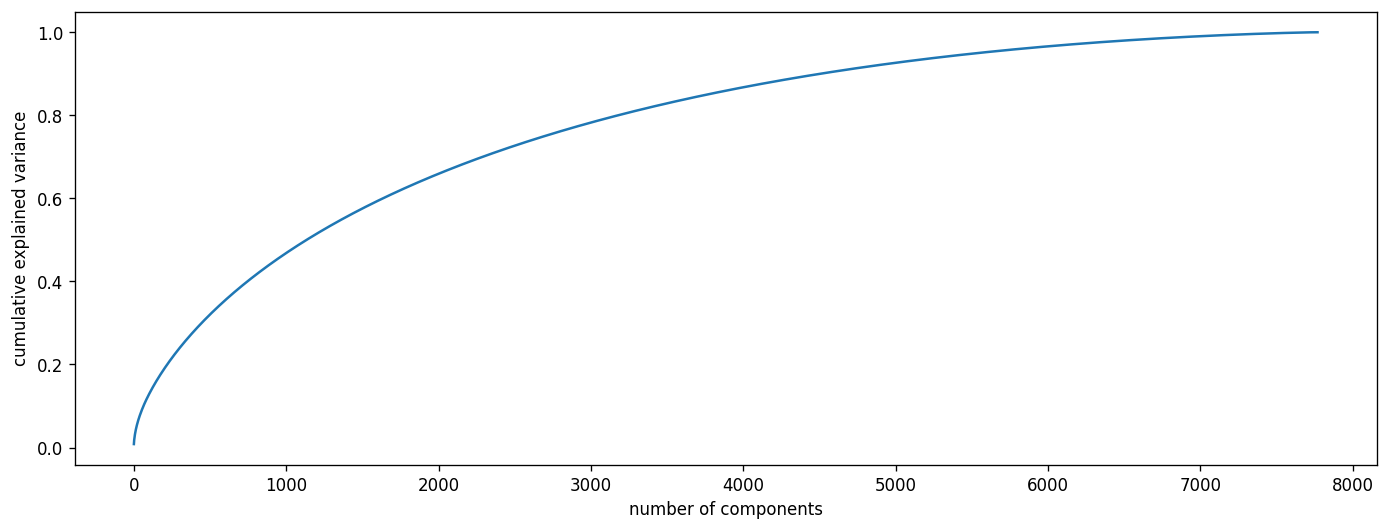

In [44]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* We can see from the above plot almost 95% of the variance can be explained by 5000 components.
* Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [47]:
pca_tuned = PCA(n_components=5000)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5000)

In [48]:
X_transformed

array([[ 1.16827901e-01, -3.10369903e-02, -3.41246062e-03, ...,
        -1.79854520e-03, -7.63243167e-03,  8.98526686e-03],
       [-4.36200516e-02, -3.76015060e-02,  2.87479309e-02, ...,
         1.66970683e-03,  1.01036253e-02,  9.25303735e-03],
       [-5.64130207e-02, -7.12843503e-02,  8.35385566e-03, ...,
        -4.06459845e-04, -2.25336637e-03, -9.23281249e-03],
       ...,
       [-5.48001710e-02,  1.94571030e-01,  9.70241682e-02, ...,
        -9.47824400e-03, -1.31496047e-02,  8.57450338e-03],
       [ 1.03010848e-01,  1.85228855e-04,  8.46923825e-03, ...,
         6.55925665e-03,  1.35469571e-02,  3.65357917e-03],
       [-3.48841516e-02,  3.90448132e-01,  8.66812216e-02, ...,
         5.52689990e-03, -4.31618769e-03, -5.86522660e-03]])

Above we have used Principal component analysis which is one of the dimensionality reduction technique. We have used it in order to capture the maximum variance of our data into small number of features.

# **ML Model Implementation**

## **Recommender System**

In [49]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [50]:
#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['org_new'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 41973)

We'll use cosine similarity over tf-idf because-:
* Cosine similarity handles high dimensional sparse data better. 

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

### **Using Cosine Similarity**

Cosine similarity is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [52]:
programme_list=new_df['title'].to_list()

In [53]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)         #finds the index of the input title in the programme_list.
    sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index between the input title and all other programmes in the dataset.
    
    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11]  #sorts the list of tuples by similarity score in descending order.
    recommend_index = [i[0] for i in sim_score]
    rec_movie = new_df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommended movie','Similarity(0-1)'])
    return rec_table
     

This function calculates the cosine similarity scores between the input title and all other titles in the dataset, sorts them in descending order, and returns the top 10 movies with the highest similarity scores as recommendations.

In [54]:
recommend("Indiana Jones and the Last Crusade")

,Recommended movie,Similarity(0-1)
0,Indiana Jones and the Raiders of the Lost Ark,0.3160
1,Indiana Jones and the Kingdom of the Crystal S...,0.1974
2,Indiana Jones and the Temple of Doom,0.1949
3,Monty Python and the Holy Grail,0.1294
4,Lincoln,0.1252
5,A Bridge Too Far,0.1225
6,The Adventures of Tintin,0.1087
7,The Battle of Midway,0.1073
8,Pawn Stars,0.1060
9,Patriot Games,0.1023


In [55]:
recommend('Betaal')

,Recommended movie,Similarity(0-1)
0,Poshter Girl,0.1284
1,Agent Raghav,0.1200
2,Anjaan: Rural Myths,0.1077
3,Bard of Blood,0.0991
4,Gunjan Saxena: The Kargil Girl,0.0917
5,Manusangada,0.0897
6,Fear Files... Har Mod Pe Darr,0.0866
7,Battlefield Recovery,0.0853
8,Back with the Ex,0.0844
9,Sacred Games,0.0841


In [56]:
recommend('Zindagi Na Milegi Dobara')

,Recommended movie,Similarity(0-1)
0,Luck by Chance,0.2663
1,Dil Dhadakne Do,0.2196
2,Lakshya,0.1790
3,Bombay Talkies,0.1576
4,Zero,0.1553
5,Dev.D,0.1541
6,Don 2,0.1506
7,Ghost Stories,0.1468
8,Waiting,0.1442
9,Shanghai,0.1425


In [57]:
recommend('Iron Man: Armored Adventures')

,Recommended movie,Similarity(0-1)
0,LoliRock,0.1216
1,LEGO Jurassic World: Secret Exhibit,0.1205
2,Strawberry Shortcake: Berry Bitty Adventures,0.1115
3,NOVA: Secrets of the Shining Knight,0.1051
4,Little Baby Bum: Nursery Rhyme Friends,0.1029
5,The Hollow,0.0994
6,Marvel's Iron Man & Hulk: Heroes United,0.0978
7,The Umbrella Academy,0.0966
8,Kong: King of the Apes,0.0942
9,Learning Songs by Little Baby Bum: Nursery Rhy...,0.0941


In [58]:
recommend('Shootout at Lokhandwala')

,Recommended movie,Similarity(0-1)
0,Mission Istaanbul: Darr Ke Aagey Jeet Hai,0.2807
1,Kyun! Ho Gaya Na,0.2320
2,Kabhi Alvida Naa Kehna,0.1630
3,Hello Brother,0.1622
4,Kisaan,0.1581
5,Lagaan,0.1540
6,Action Replayy,0.1510
7,Dum,0.1468
8,Mumbai Cha Raja,0.1446
9,Golmaal Returns,0.1396


In [59]:
new_df.head()

,title,org_new
0,3%,in a futur where the elit inhabit an island pa...
1,7:19,after a devast earthquak hit mexico citi trap ...
2,23:59,when an armi recruit is found dead his fellow ...
3,9,in a postapocalypt world ragdol robot hide in ...
4,21,a brilliant group of student becom cardcount e...


In [60]:
import pickle
pickle.dump(new_df.to_dict(), open('movie_dict.pkl', 'wb'))

In [68]:
import pickle
pickle.dump(cosine_sim, open('cosine_sim.pkl', 'wb'))

In [69]:
data.iloc[[0][0]].title

'3%'